##Part 1

In [3]:
%pip install matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install sounddevice scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import time 
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [7]:
fs = 44100  # Sample rate
duration = 3 
total_samples = fs * duration
print(f"Sampling frequency: fs = {fs} Hz")
print(f"Sampling period: Ts = {1/fs*1000:.4f} seconds")
print(f"Duration: {duration} seconds")
print(f"Total samples to record: {total_samples}")

Sampling frequency: fs = 44100 Hz
Sampling period: Ts = 0.0227 seconds
Duration: 3 seconds
Total samples to record: 132300


In [11]:
print("Get ready to say 'Ahhh'...")
for i in range(3, 0, -1):
    print(f"{i}...")
    time.sleep(1)
print(f"Recording for {duration} seconds...")
# Record audio
my_recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait() # Wait until recording finishes
print("Recording complete")
#playback 
print("Playing back....")
sd.play(my_recording, fs)
sd.wait()
print("Playback complete!")

Get ready to say 'Ahhh'...
3...
2...
1...
Recording for 3 seconds...
Recording complete
Playing back....
Playback complete!


Playing back....
Playback complete!


Part 2 

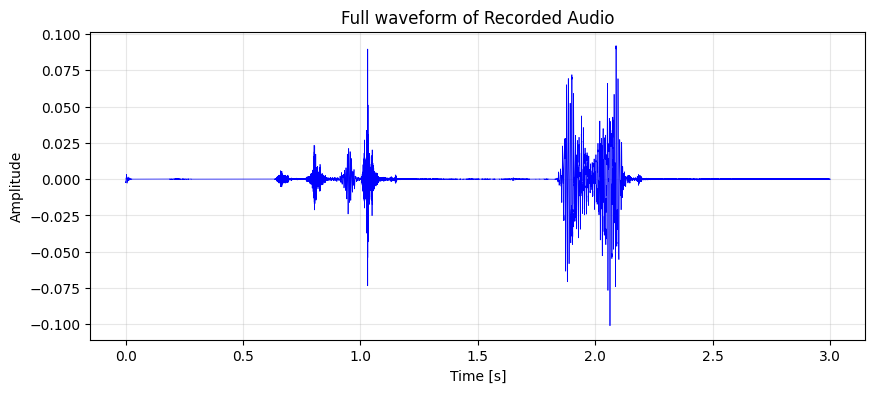

Number of samples recorded: 132300 
Time axis range from t = 0 to t = 3.0000 seconds


In [12]:
#t = n * Ts = n / fs
t = np.arange(len(my_recording)) / fs

plt.figure(figsize=(10, 4))
plt.plot(t, my_recording, color ='blue', linewidth=0.5)
plt.title("Full waveform of Recorded Audio")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Number of samples recorded: {len(my_recording)} ")
print(f"Time axis range from t = 0 to t = {t[-1]:.4f} seconds")

Total samples to record: 132300


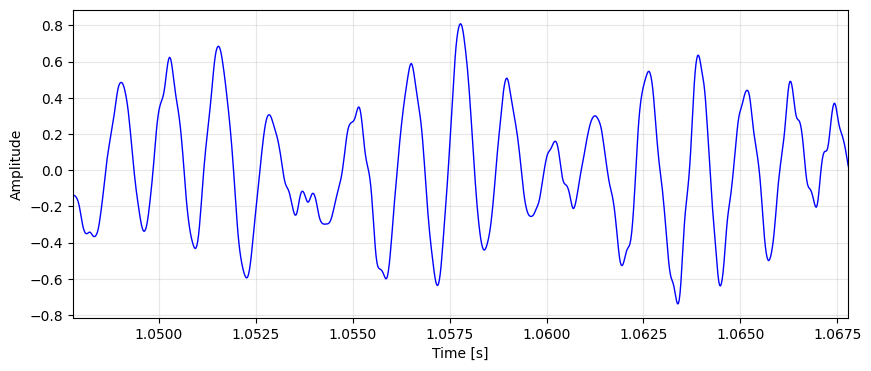

In [59]:
peak_idx = np.argmax(np.abs(my_recording))
peak_time = peak_idx / fs

zoom_s = peak_time - 0.010  #10ms before peak
zoom_e = peak_time + 0.010  #10ms after peak

#plot 
plt.figure(figsize=(10, 4))
plt.plot(t, my_recording, color='blue', linewidth=1)
plt.xlim(zoom_s, zoom_e)
plt.title(print(f"Total samples to record: {total_samples}"))
plt.xlabel("Time [s]") 
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.3)
plt.show() 

In [25]:
t_ms = t * 1000 

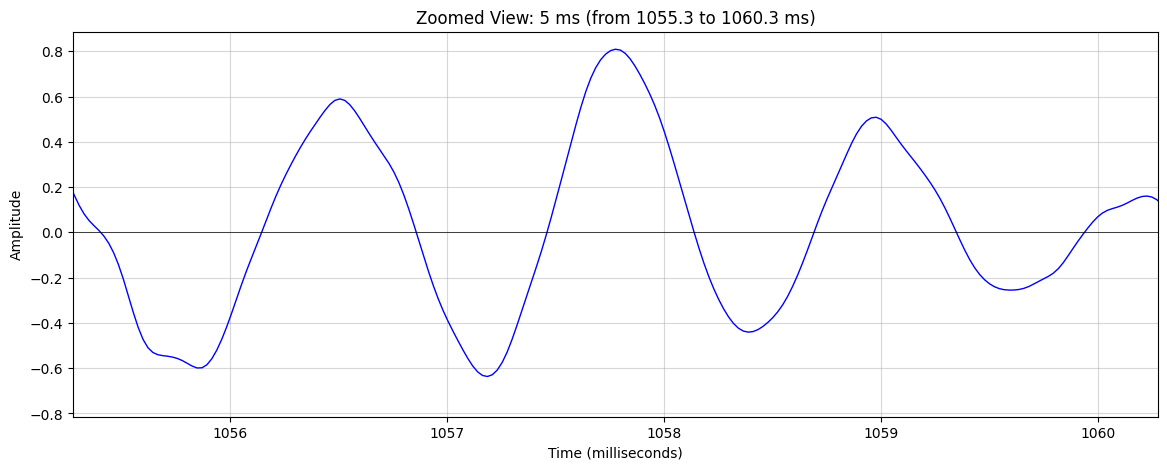

In [60]:
t_ms = t * 1000  #time in milliseconds
peak_time_ms = peak_time * 1000  #peak time in milliseconds

start_ms = peak_time_ms - 2.5  #10ms before peak
end_ms = peak_time_ms + 2.5  #10ms after peak

#plot 
plt.figure(figsize=(14, 5))
plt.plot(t_ms, my_recording, 'b-', linewidth=1)
plt.xlim(start_ms, end_ms)
plt.title(f"Zoomed View: 5 ms (from {start_ms:.1f} to {end_ms:.1f} ms)")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()

In [14]:
target_start = 1056
target_end = target_start +  2.0 

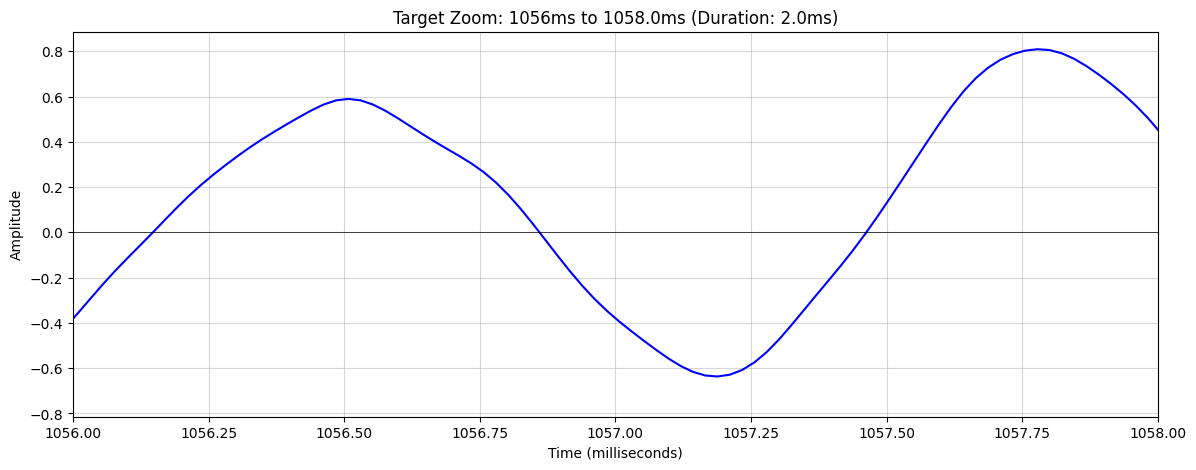

In [67]:
# Plot the selected 2 ms segment
plt.figure(figsize=(14, 5))
plt.plot(t_ms, my_recording, 'b-', linewidth=1.5)
plt.xlim(target_start, target_end)
plt.title(f"Target Zoom: {target_start}ms to {target_end}ms (Duration: 2.0ms)")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()

Part 3

In [26]:
# Find indices for the selected 2 ms segment
idx_start = int((target_start/1000) * fs)
idx_end = int((target_end/1000) * fs)
print(t_ms[idx_start:idx_end])

[1055.98639456 1056.00907029 1056.03174603 1056.05442177 1056.07709751
 1056.09977324 1056.12244898 1056.14512472 1056.16780045 1056.19047619
 1056.21315193 1056.23582766 1056.2585034  1056.28117914 1056.30385488
 1056.32653061 1056.34920635 1056.37188209 1056.39455782 1056.41723356
 1056.4399093  1056.46258503 1056.48526077 1056.50793651 1056.53061224
 1056.55328798 1056.57596372 1056.59863946 1056.62131519 1056.64399093
 1056.66666667 1056.6893424  1056.71201814 1056.73469388 1056.75736961
 1056.78004535 1056.80272109 1056.82539683 1056.84807256 1056.8707483
 1056.89342404 1056.91609977 1056.93877551 1056.96145125 1056.98412698
 1057.00680272 1057.02947846 1057.0521542  1057.07482993 1057.09750567
 1057.12018141 1057.14285714 1057.16553288 1057.18820862 1057.21088435
 1057.23356009 1057.25623583 1057.27891156 1057.3015873  1057.32426304
 1057.34693878 1057.36961451 1057.39229025 1057.41496599 1057.43764172
 1057.46031746 1057.4829932  1057.50566893 1057.52834467 1057.55102041
 1057.5

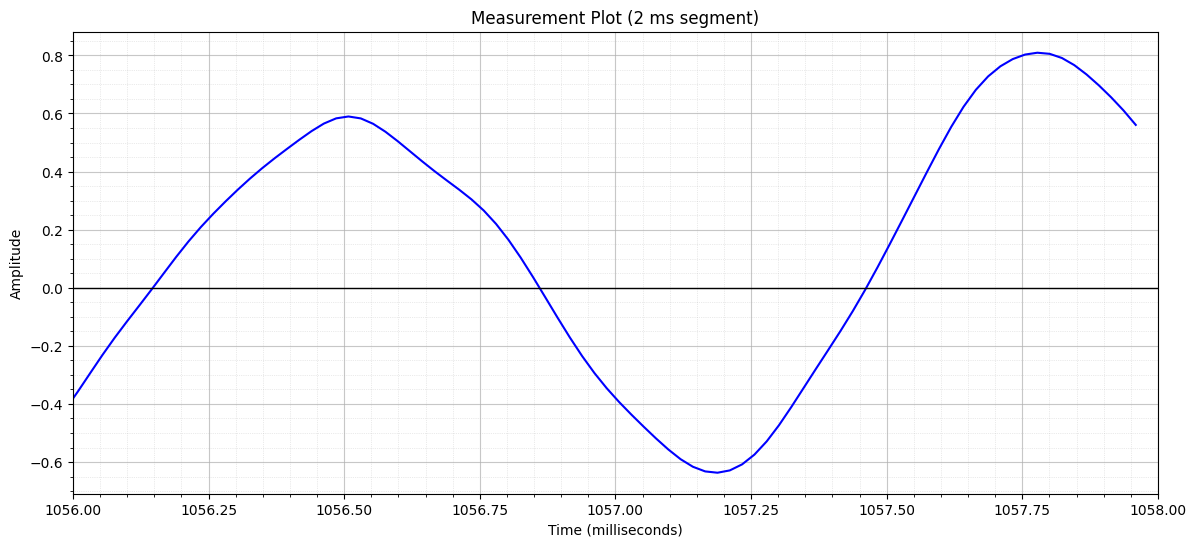

In [69]:
# Plot with dense grid
plt.figure(figsize=(14, 6))
plt.plot(t_ms[idx_start:idx_end], my_recording[idx_start:idx_end],
'b-', linewidth=1.5)
plt.xlim(target_start, target_end)
plt.title("Measurement Plot (2 ms segment)")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
# Dense grid for easier measurement
plt.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.7)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=1)
plt.show()

In [35]:
segment = my_recording[idx_start:idx_end]
print(segment)

[[-3.0822754e-03]
 [-2.7465820e-03]
 [-1.0375977e-03]
 [ 1.7089844e-03]
 [ 4.4250488e-03]
 [ 5.9814453e-03]
 [ 5.4626465e-03]
 [ 2.9296875e-03]
 [-7.0190430e-04]
 [-4.0588379e-03]
 [-5.8593750e-03]
 [-5.3710938e-03]
 [-2.7160645e-03]
 [ 1.2817383e-03]
 [ 5.1879883e-03]
 [ 7.5988770e-03]
 [ 7.5378418e-03]
 [ 4.8217773e-03]
 [ 3.0517578e-04]
 [-4.0893555e-03]
 [-6.5002441e-03]
 [-5.5847168e-03]
 [-1.7395020e-03]
 [ 2.9602051e-03]
 [ 5.8593750e-03]
 [ 5.0964355e-03]
 [ 1.0375977e-03]
 [-3.9672852e-03]
 [-7.1716309e-03]
 [-7.2326660e-03]
 [-5.0964355e-03]
 [-2.8991699e-03]
 [-2.0446777e-03]
 [-2.3803711e-03]
 [-2.4108887e-03]
 [-1.0375977e-03]
 [ 1.5258789e-03]
 [ 3.7536621e-03]
 [ 4.0588379e-03]
 [ 2.0141602e-03]
 [-1.3427734e-03]
 [-4.2419434e-03]
 [-5.6152344e-03]
 [-5.3405762e-03]
 [-4.2114258e-03]
 [-2.9907227e-03]
 [-1.8615723e-03]
 [-7.6293945e-04]
 [ 2.1362305e-04]
 [ 4.8828125e-04]
 [-5.1879883e-04]
 [-2.5939941e-03]
 [-4.5471191e-03]
 [-5.0964355e-03]
 [-3.9978027e-03]
 [-2.04467

In [36]:
# Extract the 2 ms segment
segment = my_recording[idx_start:idx_end]

# Compute peak-to-peak value
ptp_height = (segment.max() - segment.min())/ 2

print(f"Peak-to-peak height: {ptp_height}")
print(f"Max amplitude: {segment.max()}")
print(f"Min amplitude: {segment.min()}")


Peak-to-peak height: 0.007415771484375
Max amplitude: 0.007598876953125
Min amplitude: -0.007232666015625


Part 4

In [37]:
A_measured = 0.0148 # Amplitude from Step 3.2
f_measured =  800# Frequency from Step 3.4 (in Hz)
# Create time axis (same range as your 2 ms segment)
t_cos = np.linspace(target_start/1000, target_end/1000, 1000)
# Generate pure cosine: x(t) = A * cos(2*pi*f*t)
x_cos = A_measured * np.cos(2 * np.pi * f_measured * t_cos)
print(f"Pure cosine: x(t) = {A_measured} * cos(2*pi*{f_measured}*t)")
print(f"Phase phi = 0 (not yet determined)")

Pure cosine: x(t) = 0.0148 * cos(2*pi*800*t)
Phase phi = 0 (not yet determined)


In [39]:
voice_segment = my_recording[idx_start:idx_end].flatten()
t_voice_ms = t_ms[idx_start:idx_end]
# Calculate DC offset (mean value)
DC_offset = np.mean(voice_segment)
print(f"DC offset = {DC_offset:.4f}")
# Remove DC offset
voice_centered = voice_segment - DC_offset
print(f"After removing DC: mean = {np.mean(voice_centered):.6f} (approximately zero)")


DC offset = -0.0007
After removing DC: mean = -0.000000 (approximately zero)


In [ ]:
voice_segment = my_recording[idx_start:idx_end].flatten()
t_voice_ms = t_ms[idx_start:idx_end]
# Calculate DC offset (mean value)
DC_offset = np.mean(voice_segment)
print(f"DC offset = {DC_offset:.4f}")
# Remove DC offset
voice_centered = voice_segment - DC_offset
print(f"After removing DC: mean = {np.mean(voice_centered):.6f} (approximately zero)")


DC offset = -0.0007
After removing DC: mean = -0.000000 (approximately zero)


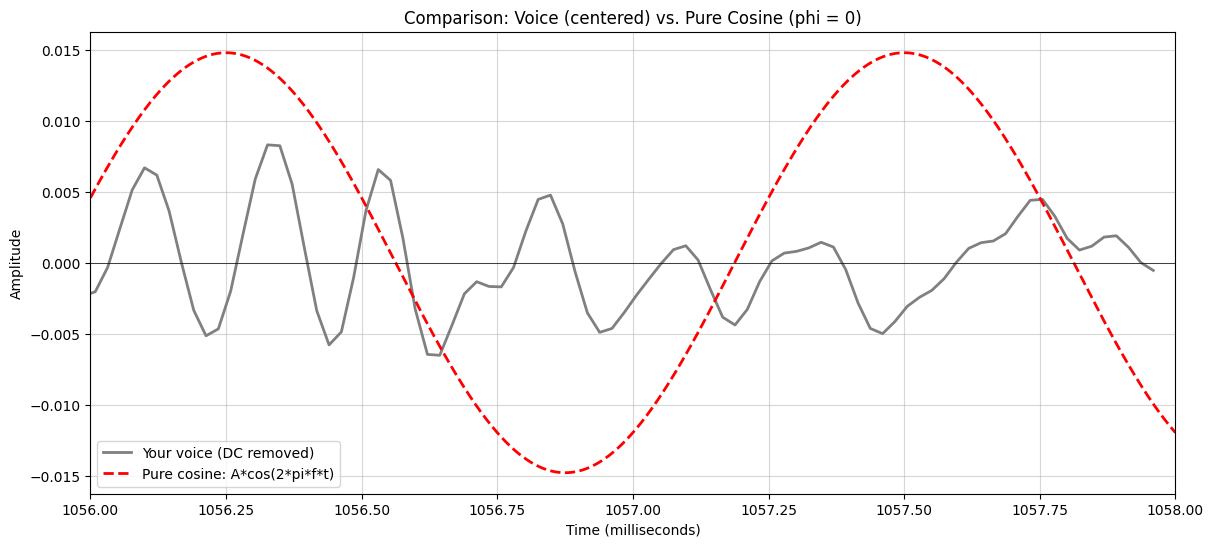

In [38]:
plt.figure(figsize=(14, 6))
plt.plot(t_voice_ms, voice_centered, 'gray', linewidth=2,
label='Your voice (DC removed)')
plt.plot(t_cos*1000, x_cos, 'r--', linewidth=2,
label='Pure cosine: A*cos(2*pi*f*t)')
plt.xlim(target_start, target_end)
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.title("Comparison: Voice (centered) vs. Pure Cosine (phi = 0)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()

Part 5

In [ ]:
# Enter your calculated phase
phi_measured =  # Phase from Step 5.2 (in radians)
# Generate phase-corrected cosine: x(t) = A * cos(2*pi*f*t + phi)
x_cos_corrected = A_measured * np.cos(2 * np.pi * f_measured * t_cos + phi_measured)
print(f"Phase-corrected cosine:")
print(f"x(t) = {A_measured} * cos(2*pi*{f_measured}*t + {phi_measured:.4f})")

In [ ]:

plt.figure(figsize=(14, 6))
# Your voice (DC removed)
plt.plot(t_voice_ms, voice_centered, 'gray', linewidth=2.5,
label='Your voice (DC removed)')
# Phase-corrected cosine
plt.plot(t_cos*1000, x_cos_corrected, 'r-', linewidth=2,
label=f'Cosine with phi = {phi_measured:.2f} rad')
plt.xlim(target_start, target_end)
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.title("Final Result: Voice vs. Phase-Corrected Cosine (In Phase)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()
print("")
print("Your voice can be approximated by:")
print(f"x(t) = {A_measured:.4f} * cos(2*pi*{f_measured:.1f}*t + {phi_measured:.4f})")